In [85]:
#important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
student=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
student.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [87]:
student.info()
student.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


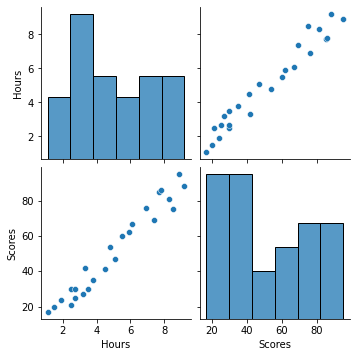

In [88]:
#Data Visualisation
sns.pairplot(student)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


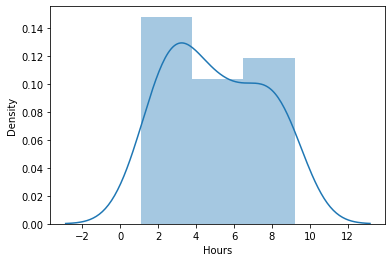

In [89]:
sns.distplot(student['Hours'])


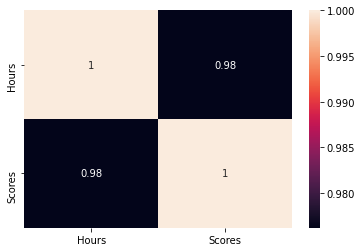

In [90]:
sns.heatmap(student.corr(),annot=True)


In [91]:
X=student.iloc[:, :-1].values
y=student.iloc[:,1].values

In [92]:
#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
#Model Prediction
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
pre=lm.predict(X_test)

In [96]:
df1=pd.DataFrame({"Actual":y_test,"Predicted":pre})
print(df1)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [97]:
#prediction of score of a student who studies 9.5 hours/day
test=[[9.25]]
test=np.array(test)
print(type (test))
result=lm.predict(test)

<class 'numpy.ndarray'>


In [98]:
print("Hours",9.25)
print("Score",result[0])

Hours 9.25
Score 93.69173248737539


In [99]:
from sklearn import metrics
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,pre))

Mean Absolute Error 4.183859899002982


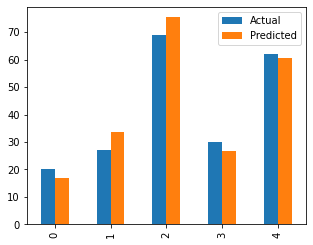

In [100]:
df1.plot.bar(figsize=(5,4))